In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install mglearn

데이터를 만들어주고, 데이터를 가지고 그림을 그릴 수 있는 패키지이다.<br/>
일반적으로 데이터를 만드는 방식은 아니고, 테스트에 쓸 데이터를 만들어주는 패키지라고 생각하면 된다.

In [2]:
import mglearn

# 지도 학습 알고리즘 (Supervised learning)

### 데이터를 불러오는 방법

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


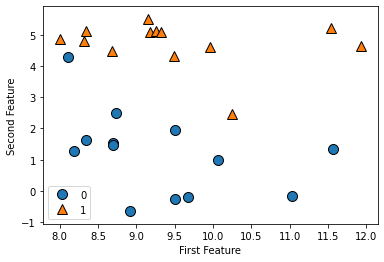

In [3]:
# X = feature, y = label
# 대문자와 소문자로 쓰는거는 관행
# forge로 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#matplotlib을 사용하는 것과 같은 결과를 도출한다.
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()

mglearn에서 제공하는 forge 데이터셋을 이용한 분류 모델을 만들었다<br/>
forge는 인위적으로 만들어진 분류 데이터 셋이다.<br/>
X,y = mglearn.datasets.make_forge()를 통해 데이터를 적재한다.<br/>

Text(0, 0.5, 'target')

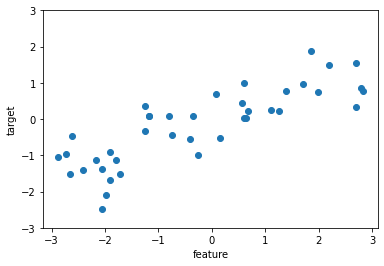

In [49]:
# 회귀 알고리즘에서는 인위적으로 만든 wave 데이터 셋을 사용한다.
# wave 데이터셋은 입력 특성하나와 모델링 타깃 변수를 가진다.

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) # y축 범위 : -3 ~ 3
plt.xlabel("feature")
plt.ylabel("target")

scikit-learn에 들어 있는 실제 데이터셋 중 유방암에 대한 데이터셋을 사용해본다.<br/>
유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋(줄여서 cancer)<br/>
각 종양은 양성과 악성으로 레이블 되어 있고,<br/>
조직 데이터를 기반으로 종양이 악성인지를 예측 할 수 있도록 학습하는 것이 과제

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
cancer.data.shape
# 유방암과 관련된 feature를 30개로 정의하고 있다.
# 데이터는 총 569개 쌓여있다.

(569, 30)

In [7]:
cancer.target
# 양성과 음성 두가지 결과로 나오는데
# 양성은 malignant, 음성은 benign
# 유방암은 증상이 잘 알려진 편이라 음성과 양성을 분명하게 나뉠 수 있다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer.feature_names
# 특성의 이름, 30가지 요소가 있고 이것으로 인해 양성과 음성이 결정된다.
# 숫자들이 가지고 있는 insight를 뽑아내려면 결과적으로 전문가와 협업해야 한다.

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# k-최근접 이웃
- k-NN(k-Nearest Neighbors)알고리즘은 가장 간단한 머신러닝 알고리즘<br/>
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부<br/>
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터넷에서 가장 가까운 데이터 포인트,<br/>즉 '최근접 이웃'을 찾습니다.

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


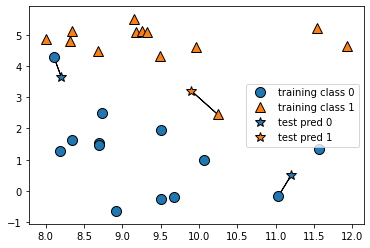

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# classification용 데이터를 그림으로 바로 볼 수 있다.

이웃의 갯수를 달리하면 판별이 달라진다.

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


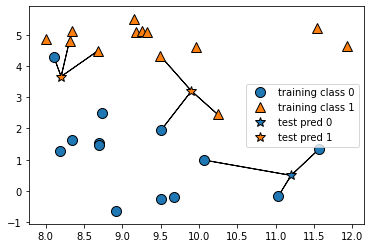

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

주변의 점 3개를 보고 많은 쪽으로 레이블이 정해진다.<br/>
최근접 알고리즘은 짝수로 정하지 않고 가급적 홀수로 n_neighbors 값을 준다.<br/>
만약 짝수로 값을 줬다면 길이로 레이블이 정해진다.

보통 모델을 만들때는 train, test로 나눠서 사용하지만
train, test, validation 으로 나눠서 사용할 수도 있다.

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# 실제로 데이터를 쪼개는 작업
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
# 최근접 분류 알고리즘 준비
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [14]:
# 학습용 데이터 셋을 사용해서 분류 모델을 학습
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [16]:
clf.score(X_test, y_test)

0.8571428571428571

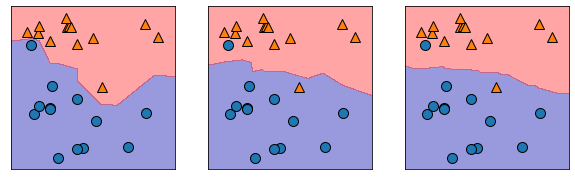

In [17]:
# 1개, 3개, 9개에 따라 특성이 달라지는 것을 확인할것이다.
# 한 라인에 여러개를 나타낼 때 subplot을 사용한다.
fit, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9], axes) :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # 1, 3, 9 최근접을 가지게
    clf.fit(X, y)
    # 그림을 그린다.
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    # alpha : 투명도
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

데이터의 갯수가 많지 않아서 결과는 크게 바뀌지 않는다.<br/>
1개를 기준으로 봤을 때는 데이터의 특성이 예리하게 살아있다.<br/>
3개씩 기준으로 봤을 때는 가장 가까운 것은 합병되는 특성이 나온다.<br/>
9개는 데이터가 가지는 원래 특성이 사라지고 완만한 선을 가진 것이 보인다.<br/>

## 유방암 데이터

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #학습 정확도 (= 훈련 정확도)
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 테스트 정확도 (학습 정확도보다 테스트 정확도가 잘 나오는 게 중요함)
    test_accuracy.append(clf.score(X_test, y_test))

In [19]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


## 중요
학습 정확도는 100%에서 떨어지는 양상을 보이고, 테스트는 점점 올라가다가 다시 내려간다.<br/>
몇 번째에 가장 좋은 모델을 만들 수 있는 지를 평가해서 모델을 만들어서 사용하도록 한다.<br/>

Text(0, 0.5, 'Accuracy')

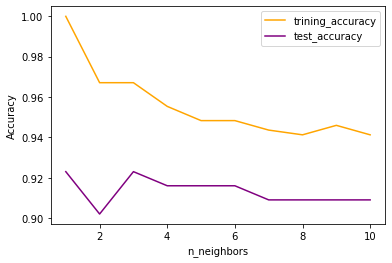

In [20]:
plt.plot(neighbors_settings, training_accuracy, label='trining_accuracy', c='orange')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy', c='purple')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

현재 데이터에서는<br/>
최근접 알고리즘에서 n_neighbors의 갯수가 3개일때 제일 테스트 정확도가 좋았다.<br/>
데이터마다 다르기 때문에 학습하고 결과를 보고 결정해야 한다.<br/>
1개일 때는 데이터의 특성을 너무 담고 있어서 해당 데이터에 대해서만 사용가능 한 것이다.

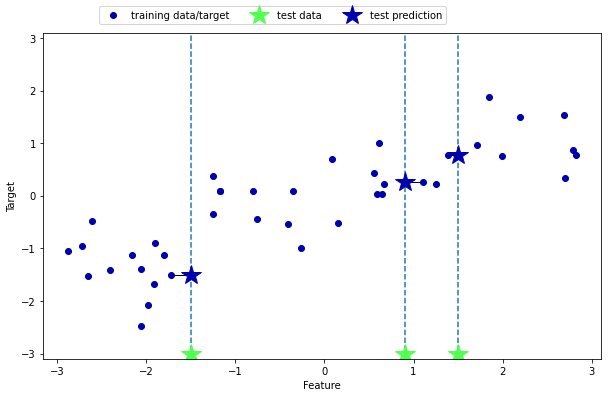

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

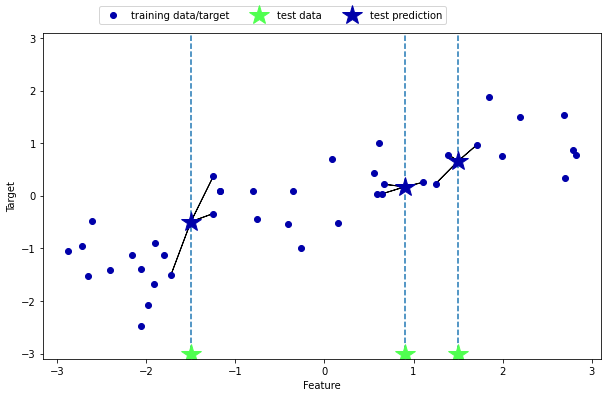

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 갯수가 많아질수록 별끼리 이은 선의 경사가 완만해진다.
# 데이터의 특성이 완화된다. 완화되는 것이 좋은 것은 아니다.

In [23]:
from sklearn.neighbors import KNeighborsRegressor # 회귀문제를 풀어본다
X, y = mglearn.datasets.make_wave(n_samples=40) # 40개의 샘플데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
reg.predict(X_test)
reg.score(X_test, y_test)

0.8344172446249605

In [25]:
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

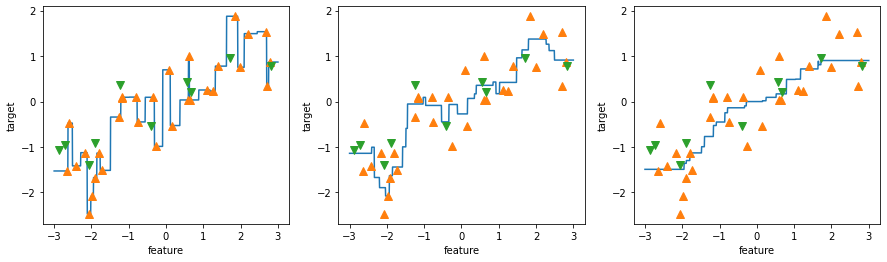

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8) # 학습 데이터를 마커로 표현
    ax.plot(X_test, y_test, 'v', markersize=8)
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

w[0]: 0.393906  b: -0.031804


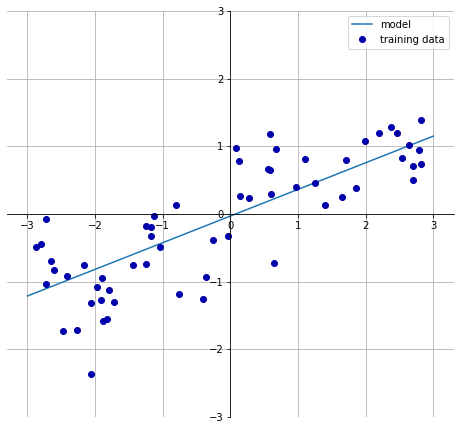

In [27]:
mglearn.plots.plot_linear_regression_wave()

점으로 된 값들의 평균 값이 model line 이다.

In [57]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [58]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [59]:
lr.coef_      # w = 가중치 = 계수 = coef_ 속성에 저장
lr.intercept_ # b = 편향 = 절편 = intercept_ 속성에 저장

-0.031804343026759746

In [60]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [61]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.6074721959665788


## Ridge / 릿지
- 회귀를 위한 선형 모델
- 가중치(계수, w, coef_값) 선택은 훈련 데이터를 잘 예측하기 위한 것 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
- 가중치의 절대값을 간으한 작게 만드는 것이 좋다
- w의 모든 원소가 0에 가깝게 되길 원함
- 모든 특성이 출력에 주는 영향을 최소한으로 만듬
- 규제 : 과대적합이 되지 않도록 모델을 강제로 제한하는 의미
- 리지 회귀에 사용하는 규제 방식을 L2 규제

In [62]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # default value = 1.0

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.885796658517094
0.7527683481744752


In [63]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369616
0.6359411489177311


In [64]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001985
0.7722067936479811


alpha 값은 제약이다. alpha 값을 줄일수록 제약이 줄어들면서 점수가 바뀐다.<br/>
아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression 모델과 거의 같아진다.<br/>
for문을 걸어놓고 제약이 어디쯤 제일 잘 나오는 지 보면 된다.<br/><br/>

훈련 세트의 점수가 테스트 세트의 점수보다 높다.<br/>
데이터를 충분히 주면 규제 항목이 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이라 한다.<br/>

In [37]:
# 연습

import numpy as np
np.linspace(0, 1, 11)

for i in np.linspace(0, 100, 1000) :
    ridgeTest = Ridge(alpha=i).fit(X_train, y_train)
    print(i,' : ', ridgeTest.score(X_train, y_train), ridgeTest.score(X_test, y_test))

0.0  :  0.9520003825588945 0.6039587357836507
0.1001001001001001  :  0.9282171604515123 0.7722161242634561
0.2002002002002002  :  0.9199139230223696 0.7749434630314416
0.3003003003003003  :  0.9136318041259568 0.7732341251836508
0.4004004004004004  :  0.9083552270339974 0.7705355547801392
0.5005005005005005  :  0.903718447003567 0.7675486241446373
0.6006006006006006  :  0.8995402474657141 0.764494766659041
0.7007007007007008  :  0.8957148524297253 0.7614597149835471
0.8008008008008008  :  0.8921737636775592 0.7584800181114637
0.9009009009009009  :  0.8888693124330311 0.7555715116944274
1.001001001001001  :  0.8857665360564501 0.7527404280353583
1.1011011011011012  :  0.8828387508744164 0.7499882709543102
1.2012012012012012  :  0.8800649507455458 0.7473141418486771
1.3013013013013013  :  0.8774281848290343 0.7447159191431675
1.4014014014014016  :  0.8749144962392534 0.7421908829546593
1.5015015015015016  :  0.8725121997247313 0.7397360557774029
1.6016016016016017  :  0.8702113736321181 

14.414414414414415  :  0.768285512735096 0.608794734615405
14.514514514514515  :  0.7678864337379434 0.6082561892529044
14.614614614614615  :  0.7674892010128793 0.6077203709284529
14.714714714714715  :  0.767093787533395 0.6071872453561196
14.814814814814815  :  0.7667001668652373 0.6066567789230769
14.914914914914915  :  0.766308313150245 0.606128938672509
15.015015015015017  :  0.7659182010907091 0.6056036922870451
15.115115115115117  :  0.7655298059342412 0.6050810080726942
15.215215215215217  :  0.7651431034591255 0.6045608549432715
15.315315315315317  :  0.7647580699601411 0.6040432024052933
15.415415415415417  :  0.764374682234834 0.6035280205433247
15.515515515515517  :  0.7639929175702244 0.6030152800057669
15.615615615615617  :  0.7636127537299312 0.6025049519910649
15.715715715715717  :  0.7632341689417006 0.601997008234325
15.815815815815817  :  0.7628571418853216 0.6014914209943248
15.915915915915917  :  0.7624816516809175 0.6009881630409037
16.016016016016017  :  0.762107

28.32832832832833  :  0.7237458633472393 0.5510242231015385
28.42842842842843  :  0.7234766675892641 0.5506925799031159
28.52852852852853  :  0.7232079686003664 0.5503617745190639
28.62862862862863  :  0.7229397635217083 0.550031802152664
28.72872872872873  :  0.7226720495276405 0.5497026580553299
28.82882882882883  :  0.7224048238251797 0.5493743375259303
28.92892892892893  :  0.7221380836534956 0.5490468359101259
29.02902902902903  :  0.7218718262834076 0.5487201485997144
29.12912912912913  :  0.7216060490168903 0.54839427103199
29.22922922922923  :  0.7213407491865893 0.5480691986891142
29.32932932932933  :  0.7210759241553445 0.5477449270974932
29.42942942942943  :  0.7208115713157246 0.5474214518271726
29.52952952952953  :  0.7205476880895666 0.5470987684912356
29.62962962962963  :  0.7202842719275284 0.546776872745217
29.72972972972973  :  0.7200213203086452 0.5464557602865243
29.82982982982983  :  0.7197588307398968 0.5461354268538696
29.929929929929934  :  0.7194968007557817 0.

42.04204204204204  :  0.6906236595770936 0.5118767294997211
42.14214214214214  :  0.6904049361537707 0.511628892223398
42.24224224224224  :  0.6901864946010012 0.5113815069745257
42.34234234234234  :  0.6899683340728566 0.511134572130117
42.44244244244244  :  0.6897504537289503 0.5108880860772362
42.54254254254254  :  0.6895328527343794 0.5106420472129074
42.64264264264264  :  0.6893155302596654 0.5103964539440233
42.74274274274275  :  0.6890984854806997 0.5101513046872552
42.84284284284285  :  0.6888817175786845 0.5099065978689646
42.94294294294295  :  0.6886652257400789 0.5096623319251147
43.04304304304305  :  0.6884490091565442 0.509418505301183
43.14314314314315  :  0.6882330670248886 0.5091751164520772
43.24324324324325  :  0.6880173985470152 0.5089321638420492
43.34334334334335  :  0.6878020029298686 0.5086896459446113
43.44344344344345  :  0.6875868793853828 0.5084475612424544
43.54354354354355  :  0.6873720271304307 0.508205908227364
43.64364364364365  :  0.6871574453867726 0.5

57.15715715715716  :  0.6604011027991152 0.4788250440785592
57.25725725725726  :  0.660217606672473 0.4786313163711827
57.35735735735736  :  0.6600343056133791 0.47843787363775425
57.45745745745746  :  0.659851199224827 0.47824471512857314
57.55755755755756  :  0.6596682871113222 0.4780518400971182
57.65765765765766  :  0.6594855688788701 0.4778592478000274
57.75775775775776  :  0.6593030441349682 0.4776669374970782
57.85785785785786  :  0.6591207124885938 0.4774749084511678
57.95795795795796  :  0.6589385735501958 0.4772831599282932
58.05805805805806  :  0.6587566269316836 0.47709169119753236
58.15815815815816  :  0.6585748722464184 0.47690050153102526
58.25825825825826  :  0.6583933091092025 0.4767095902039542
58.35835835835836  :  0.6582119371362702 0.47651895649452547
58.45845845845846  :  0.6580307559452783 0.4763285996839499
58.55855855855856  :  0.657849765155297 0.4761385190564257
58.65865865865866  :  0.6576689643868001 0.4759487138991185
58.75875875875876  :  0.65748835326165

72.57257257257258  :  0.634232274097504 0.4519611960732344
72.67267267267268  :  0.6340748642206302 0.45180405977565585
72.77277277277278  :  0.6339176016053941 0.4516471214068971
72.87287287287288  :  0.6337604860074058 0.4514903805431193
72.97297297297298  :  0.6336035171829223 0.4513338367618609
73.07307307307308  :  0.633446694888844 0.45117748964203064
73.17317317317318  :  0.6332900188827129 0.45102133876390216
73.27327327327328  :  0.6331334889227088 0.4508653837091062
73.37337337337338  :  0.6329771047676471 0.45070962406062565
73.47347347347348  :  0.6328208661769759 0.4505540594027885
73.57357357357358  :  0.6326647729107725 0.4503986893212615
73.67367367367368  :  0.6325088247297421 0.4502435134030439
73.77377377377378  :  0.632353021395214 0.45008853123646286
73.87387387387388  :  0.6321973626691391 0.44993374241116457
73.97397397397398  :  0.6320418483140868 0.44977914651811046
74.07407407407408  :  0.631886478093244 0.44962474314957
74.17417417417418  :  0.631731251770410

87.78778778778779  :  0.6118679865376077 0.4301306072921144
87.8878878878879  :  0.6117304759536113 0.42999936611956835
87.98798798798799  :  0.6115930815958548 0.4298682712600981
88.0880880880881  :  0.611455803293832 0.4297373224431599
88.18818818818819  :  0.6113186408774022 0.42960651939893824
88.2882882882883  :  0.6111815941767882 0.42947586185834263
88.38838838838839  :  0.6110446630225765 0.42934534955300563
88.4884884884885  :  0.6109078472457149 0.4292149822152783
88.58858858858859  :  0.6107711466775116 0.42908475957823033
88.6886886886887  :  0.6106345611496347 0.42895468137564485
88.78878878878879  :  0.6104980904941104 0.4288247473420169
88.8888888888889  :  0.6103617345433219 0.42869495721255046
88.988988988989  :  0.6102254931300086 0.42856531072315673
89.0890890890891  :  0.6100893660872648 0.4284358076104495
89.1891891891892  :  0.6099533532485388 0.42830644761174474
89.2892892892893  :  0.6098174544476308 0.42817723046505685
89.3893893893894  :  0.6096816695186934 0.

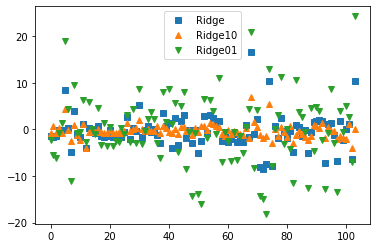

In [38]:
plt.plot(ridge.coef_, 's', label='Ridge')
plt.plot(ridge10.coef_, '^', label='Ridge10')
plt.plot(ridge01.coef_, 'v', label='Ridge01')
plt.legend()

결과를 예측할 때 제약을 10 걸었더니 데이터에서 튀는 데이터가 많이 없는 것을 볼 수 있다.<br/>
0.1을 걸었더니 제약이 풀리면서 범위가 훨씬 넓어졌다.<br/>
높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값 보다 coef_ 절대값의 크기가 작을 것이라고 예상

### 제약을 얼마나 거냐에 따라 예측되는 데이터의 편차가 벌어지는 지가 달라진다.
#### 규제를 이해하는 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 본다.

## Lasso / 라쏘 회귀
- 선형회귀에서 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다.
- 계수를 0에 가깝게 만들려고 한다.
- 방식이 조금 다르고 이를 L1 규제라고 한다.

In [71]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114607
0.20937503255272294
4


Lasso는 훈련 셋과 결과 셋 모두 점수가 좋지 않다.<br/>
사용한 특성의 개수도 4개로 과소적합이다.<br/>
과소적합을 줄이려면 alpha 값을 줄여본다.<br/>
그러면 반복 실행하는 최대 횟수인 max_iter의 기본값을 늘려야한다. 늘리지않으면 경고가 뜬다.

In [75]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549983
33


In [76]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515467
0.6437467421272709
96


In [77]:
lasso0 = Lasso(alpha=0).fit(X_train, y_train)
print(lasso0.score(X_train, y_train))
print(lasso0.score(X_test, y_test))
print(np.sum(lasso0.coef_ != 0))

0.9426383219008585
0.6916323869060191
104


C:\Users\Nagyeom\AppData\Local\Temp/ipykernel_26796/460168388.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0 = Lasso(alpha=0).fit(X_train, y_train)
C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

alpha 값을 낮추면 모델의 복잡도가 증가해서 훈련셋과 테스트셋의 성능이 좋아진다.<br/>
alpha 값을 너무 낮추면 규제의 효과가 없어져서 과대적합이 된다.<br/>

## 분류용 선형 모델

C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


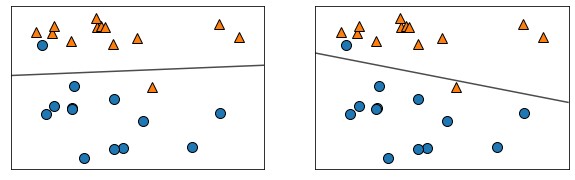

In [79]:
from sklearn.linear_model import LogisticRegression #Classification Algorithm 중 하나
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

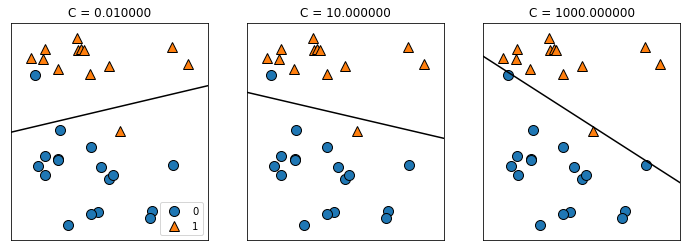

In [44]:
mglearn.plots.plot_linear_svc_regularization()
# regularization = 정규화

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
# 아무 제약을 걸지 않음

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9553990610328639
0.958041958041958


C:\Users\Nagyeom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# max_iteration을 5000번으로 늘린다.

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.960093896713615
0.972027972027972


max_iteration을 5000번이나 줬는데 결과가 빨리나온 이유?<br/>
임계치를 찾게되면 끝내버리기 때문에 5000번을 다 돌지 않아서 속도가 빠르게 보인다.<br/>
경고가 따로 뜨지 않는 것은 충분히 돌았다고 생각하기 때문이다.<br/>

# 정리

최적의 알고리즘을 찾아내는 것을 자동화 할 수 있겠다.<br/>
알고리즘 종류별로 넣고 파라미터를 바꿔보다보면 코딩으로 잘만들면 자동으로 할 수 있을 것이다.<br/>
 = autoML